# 分割レジスタ割り当て最適化
Amplify を用いたレジスタ割り当ての最適化について解説します．

## IsingRegisterAllocator
私たちは，レジスタ割り当て最適化問題を Amplify を用いて解くためのライブラリ IsingRegisterAllocator を作成しました．

ここからは，このライブラリを使って，実際にレジスタ割り当てを行ってみます．

In [1]:
from IsingRegisterAllocator import get_solution_splitted_algorithm_limited_unit
from IsingRegisterAllocator.util import convert, draw_graph, config

In [2]:
chunk_size = 4
overlap_size = 2

## MonteC

In [3]:
MonteC = convert.load_all_out_allocated("../benchmarks/MonteC/")

In [4]:
MonteC

{'interference': [[3, 5, 6, 7, 8],
  [5, 6],
  [],
  [0, 4, 7, 8],
  [3],
  [0, 1, 6],
  [0, 1, 5],
  [0, 3],
  [0, 3],
  []],
 'limitation': {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  2: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  3: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  4: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  5: [1, 2, 9, 10, 11, 12],
  6: [31, 32, 33, 34, 35, 36],
  7: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  8: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  9: [37, 38, 31, 32, 33, 34, 39, 40, 41, 35, 36, 42, 43, 44, 45]},
 'num_registers': 46}

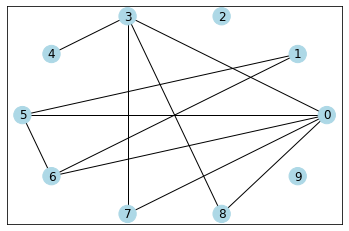

In [5]:
draw_graph(MonteC["interference"])

In [10]:
solution = get_solution_splitted_algorithm_limited_unit(
    **MonteC, 
    chunk_size=chunk_size,
    overlap_size=overlap_size,
    token=config.AMPLIFY_TOKEN
)

[10, 13, 17, 29]
[10, 13, 17, 29, 36, 14]
[10, 13, 17, 29, 36, 14, 29, 36]


In [11]:
solution

[10, 13, 17, 29, 36, 14, 29, 36, 30, 2]

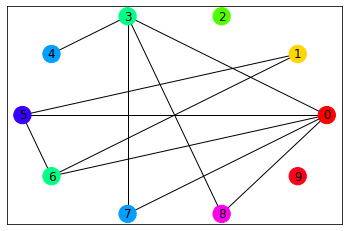

In [12]:
draw_graph(MonteC["interference"], list(solution))

## BubbleSort

In [13]:
BubbleSort = convert.load_all_out_allocated("../benchmarks/BubbleSort/")

In [14]:
BubbleSort

{'interference': [[1, 2, 3, 4, 6, 7, 9, 10, 11],
  [0, 4, 6, 7, 9, 10, 11],
  [0, 3, 4, 6, 7, 9, 10, 11],
  [0, 2, 4, 6, 7, 9, 10, 11],
  [0, 1, 2, 3, 6, 7, 9, 10, 11],
  [6, 7, 9, 10, 11],
  [0, 1, 2, 3, 4, 5, 7, 9, 10, 11],
  [0, 1, 2, 3, 4, 5, 6, 9, 10, 11],
  [9, 11],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11],
  [0, 1, 2, 3, 4, 5, 6, 7, 9, 11],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  []],
 'limitation': {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  1: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  2: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  4: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  5: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  6: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  7: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  8: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

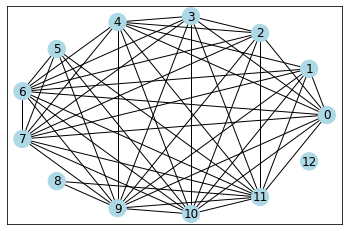

In [15]:
draw_graph(BubbleSort["interference"])

In [16]:
solution = get_solution_splitted_algorithm_limited_unit(
    **BubbleSort, 
    chunk_size=chunk_size,
    overlap_size=overlap_size,
    token=config.AMPLIFY_TOKEN
)

[1, 21, 27, 0]
[1, 21, 27, 0, 18, 14]
[1, 21, 27, 0, 18, 14, 29, 21]
[1, 21, 27, 0, 18, 14, 29, 21, 13, 1]
[1, 21, 27, 0, 18, 14, 29, 21, 13, 1, 28, 14]


In [17]:
solution

[1, 21, 27, 0, 18, 14, 29, 21, 13, 1, 28, 14, 0]

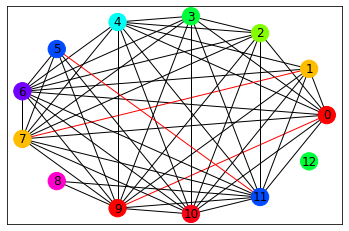

In [18]:
draw_graph(BubbleSort["interference"], list(solution))

## Simpson

In [19]:
Simpson = convert.load_all_out_allocated("../benchmarks/Simpson/")

In [20]:
Simpson

{'interference': [[1, 2, 3, 8, 9, 10, 11, 12, 14, 16, 17, 19],
  [0, 7, 8, 9, 10, 11, 16, 19],
  [0, 10, 11, 19],
  [0, 7, 8, 9, 10, 11, 16, 19],
  [7, 8, 9, 10, 11, 16, 19],
  [7, 8, 9, 10, 11, 16, 19],
  [12, 13],
  [1, 3, 4, 5],
  [0, 1, 3, 4, 5],
  [0, 1, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5],
  [0, 6],
  [6],
  [0, 18],
  [19],
  [0, 1, 3, 4, 5],
  [0],
  [14],
  [0, 1, 2, 3, 4, 5, 15]],
 'limitation': {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  1: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  2: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  3: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  4: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  5: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  6: [31, 32, 33, 34, 35, 36],
  7: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
  8: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,

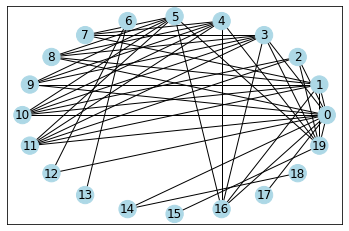

In [21]:
draw_graph(Simpson["interference"])

In [22]:
solution = get_solution_splitted_algorithm_limited_unit(
    **Simpson, 
    chunk_size=chunk_size,
    overlap_size=overlap_size,
    token=config.AMPLIFY_TOKEN
)

[3, 21, 16, 27]
[3, 21, 16, 27, 2, 30]
[3, 21, 16, 27, 2, 30, 26, 28]
[3, 21, 16, 27, 2, 30, 26, 28, 16, 13]
[3, 21, 16, 27, 2, 30, 26, 28, 16, 13, 32, 13]
[3, 21, 16, 27, 2, 30, 26, 28, 16, 13, 32, 13, 12, 28]
[3, 21, 16, 27, 2, 30, 26, 28, 16, 13, 32, 13, 12, 28, 26, 15]
[3, 21, 16, 27, 2, 30, 26, 28, 16, 13, 32, 13, 12, 28, 26, 15, 7, 12]


In [23]:
solution

[3, 21, 16, 27, 2, 30, 26, 28, 16, 13, 32, 13, 12, 28, 26, 15, 7, 12, 20, 6]

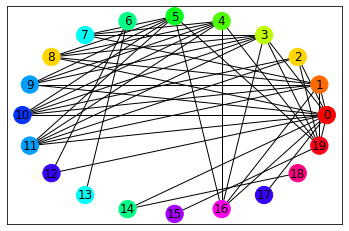

In [24]:
draw_graph(Simpson["interference"], list(solution))